# WeatherPy
----


In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build partial query URL

query_url = f"{url}appid={api_key}&units={units}&q="

In [25]:
#Testing response with one city
city='ushuaia'
response = requests.get(query_url + city).json()
#print(f"Processing record {cities.index(city)}: {city}")

In [26]:
# Testing how to fetch info from the response
response


{'coord': {'lon': -68.3, 'lat': -54.8},
 'weather': [{'id': 521,
   'main': 'Rain',
   'description': 'shower rain',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 51.8,
  'feels_like': 47.88,
  'temp_min': 51.8,
  'temp_max': 51.8,
  'pressure': 1003,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 230},
 'clouds': {'all': 75},
 'dt': 1578878700,
 'sys': {'type': 1,
  'id': 8303,
  'country': 'AR',
  'sunrise': 1578816969,
  'sunset': 1578877565},
 'timezone': -10800,
 'id': 3833367,
 'name': 'Ushuaia',
 'cod': 200}

In [10]:
# set up lists to hold reponse info for each city

lat = []
lon = []
country = []
date = []
temp_max = []
hum = []
cloud = []
wind = []

print("Beginning Data Retrieval")
print("-"*24)

# Loop through the list of cities and perform a request for data on each

#for i,city in enumerate(cities):
for city in cities:    
    try:
        print(f"Processing record {cities.index(city)}: {city}")
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        temp_max.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except KeyError:
        print('City not found. Skipping...')

print("-"*24)
print("End of Data Retrieval")
print("-"*24)

Beginning Data Retrieval
------------------------
Processing record 0: grand-lahou
Processing record 1: lebu
Processing record 2: lasa
Processing record 3: busselton
Processing record 4: puerto ayora
Processing record 5: khatanga
Processing record 6: saskylakh
Processing record 7: kyakhta
Processing record 8: mataura
Processing record 9: avarua
Processing record 10: victoria
Processing record 11: tapaua
City not found. Skipping...
Processing record 12: mar del plata
Processing record 13: kapaa
Processing record 14: noumea
Processing record 15: georgetown
Processing record 16: tuktoyaktuk
Processing record 17: raymond
Processing record 18: carnarvon
Processing record 19: parrita
Processing record 20: ushuaia
Processing record 21: mount gambier
Processing record 22: saint george
Processing record 23: punta arenas
Processing record 24: vaitupu
City not found. Skipping...
Processing record 25: bluff
Processing record 26: deputatskiy
Processing record 27: albany
Processing record 28: battic

Processing record 239: moose factory
Processing record 240: geraldton
Processing record 241: axim
Processing record 242: korla
Processing record 243: shemonaikha
Processing record 244: safaga
Processing record 245: batemans bay
Processing record 246: labuhan
Processing record 247: qaqortoq
Processing record 248: beisfjord
Processing record 249: vostok
Processing record 250: flinders
Processing record 251: bara
Processing record 252: skagastrond
City not found. Skipping...
Processing record 253: burnie
Processing record 254: chicama
Processing record 255: clyde river
Processing record 256: kibala
Processing record 257: manavalakurichi
Processing record 258: lages
Processing record 259: campos
Processing record 260: brasilia de minas
Processing record 261: narsaq
Processing record 262: half moon bay
Processing record 263: ust-kamchatsk
City not found. Skipping...
Processing record 264: serebryansk
Processing record 265: neustrelitz
Processing record 266: grdelica
Processing record 267: b

Processing record 479: mehamn
Processing record 480: yarmouth
Processing record 481: lukovetskiy
Processing record 482: gondanglegi
Processing record 483: kitimat
Processing record 484: kupang
Processing record 485: mentok
City not found. Skipping...
Processing record 486: chakwal
Processing record 487: sao joao da barra
Processing record 488: mongo
Processing record 489: henties bay
Processing record 490: beloha
Processing record 491: kemijarvi
City not found. Skipping...
Processing record 492: rairangpur
Processing record 493: sur
Processing record 494: port macquarie
Processing record 495: waingapu
Processing record 496: saldanha
Processing record 497: araouane
Processing record 498: palmer
Processing record 499: pokhara
Processing record 500: kondagaon
Processing record 501: lata
Processing record 502: sorland
Processing record 503: fria
Processing record 504: yatou
Processing record 505: linxia
Processing record 506: steinbach
Processing record 507: dingle
Processing record 508: p

In [11]:
print(f"The length of cities is {len(cities)}")
print(f"The length of country is {len(country)}")
print(f"The length of lat is {len(lat)}")
print(f"The length of lon is {len(lon)}")
print(f"The length of temp_max is {len(temp_max)}")
print(f"The length of hum is {len(hum)}")
print(f"The length of cloud is {len(cloud)}")
print(f"The length of wind is {len(wind)}")

The length of cities is 613
The length of country is 568
The length of lat is 568
The length of lon is 568
The length of temp_max is 568
The length of hum is 568
The length of cloud is 568
The length of wind is 568


In [6]:
#cities

In [8]:
#country

In [12]:
# QUESTION: why is it that when I simple do:

# cities_rev = []

# and then the loop, it doesn't work? I always get an error that says it's out of range. But if I populate 
# the list before starting the loop, I don't have this problem anymore. Why is this? It happened before too.
# But then, in some cases, like above when populating the lists with the calls from the API, it works. I would 
# be really grateful if you could give me some insights on why this is so in the comments of the homework. Thank
# you in advance.

cities_rev = np.arange(0, len(country), dtype=object)

for i in range(len(country)):
    cities_rev[i] = cities[i]

print(len(cities_rev))
#print(cities_rev)

568


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# create a data frame from cities and the data collected above from the response
weather_dict = {
    'city': cities_rev,
    'country': country,
    'date': date,
    'lat': lat,
    'lon': lon,
    'max_temp': temp_max,
    'humidity': hum,
    'cloudiness': cloud,
    'wind_speed': wind
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,country,date,lat,lon,max_temp,humidity,cloudiness,wind_speed
0,grand-lahou,CI,1579292882,5.14,-5.02,81.66,84,8,14.14
1,lebu,CL,1579292883,-37.62,-73.65,72.77,46,0,9.04
2,lasa,IT,1579292883,46.62,10.70,34.00,85,5,3.36
3,busselton,AU,1579292883,-33.65,115.33,61.00,50,0,15.82
4,puerto ayora,EC,1579292805,-0.74,-90.35,86.00,62,75,16.11


In [14]:
print(f"City       {weather_data['city'].count()}")
print(f"Country    {weather_data['country'].count()}")
print(f"Date       {weather_data['date'].count()}")
print(f"Lat        {weather_data['lat'].count()}")
print(f"Lng        {weather_data['lon'].count()}")
print(f"Max Temp   {weather_data['max_temp'].count()}")
print(f"Humidity   {weather_data['humidity'].count()}")
print(f"Cloudiness {weather_data['cloudiness'].count()}")
print(f"Wind Speed {weather_data['wind_speed'].count()}")

City       568
Country    568
Date       568
Lat        568
Lng        568
Max Temp   568
Humidity   568
Cloudiness 568
Wind Speed 568


In [17]:
# Converting the date from unix to datetime

weather_data['date'] = pd.to_datetime(weather_data['date'])

weather_data.head()

,city,country,date,lat,lon,max_temp,humidity,cloudiness,wind_speed
0,grand-lahou,CI,1970-01-01 00:00:01.579292882,5.14,-5.02,81.66,84,8,14.14
1,lebu,CL,1970-01-01 00:00:01.579292883,-37.62,-73.65,72.77,46,0,9.04
2,lasa,IT,1970-01-01 00:00:01.579292883,46.62,10.70,34.00,85,5,3.36
3,busselton,AU,1970-01-01 00:00:01.579292883,-33.65,115.33,61.00,50,0,15.82
4,puerto ayora,EC,1970-01-01 00:00:01.579292805,-0.74,-90.35,86.00,62,75,16.11


In [18]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 9 columns):
city          568 non-null object
country       568 non-null object
date          568 non-null datetime64[ns]
lat           568 non-null float64
lon           568 non-null float64
max_temp      568 non-null float64
humidity      568 non-null int64
cloudiness    568 non-null int64
wind_speed    568 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 40.1+ KB


In [19]:
weather_data.to_csv("../Resources/weather_data.csv", index=False, header=True)

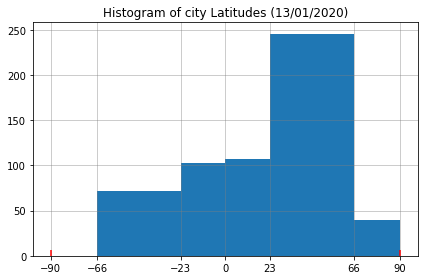

In [39]:
# Generating a histogram of the latitudes of the cities

# load file, if not done sequently 
# weather_data = pd.read_csv("../Resources/weather_data.csv")

fig, ax = plt.subplots(tight_layout=True)

#fig = plt.figure(figsize=(7,5))

bins_n = [-90, -66, -23, 0, 23, 66, 90]
plt.hist(weather_data['lat'], bins=bins_n)
plt.vlines(90, ymin=0, ymax=6, color='red')
plt.vlines(-90, ymin=0, ymax=6, color='red')

plt.xticks(bins_n)

plt.grid(color='grey', alpha=0.5)

plt.title("Histogram of city Latitudes (13/01/2020)")
#plt.xlabel("Latitude")
# plt.ylabel("Maximum Temperature (F)")

plt.savefig("../Images/latitudes-hist.png")
plt.show()

In [40]:
# The sample of randomly selected cities is highly skewed towards the north hemisphere and concentrate between 
# the tropic of cancer (23° 26′ North) and the Arctic Circle (66° 34′ North).


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

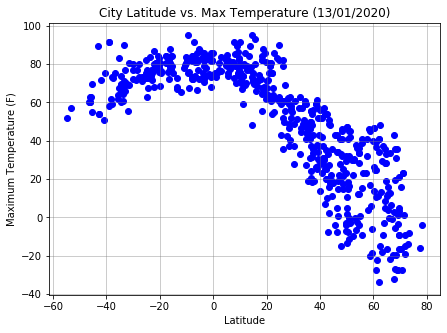

In [41]:
# Generate the plot: Latitude vs Max Temp
fig = plt.figure(figsize=(7,5))

plt.scatter(weather_data['lat'], weather_data['max_temp'], marker="o", facecolors="blue", edgecolors="blue")

plt.grid(color='grey', alpha=0.5)

plt.title("City Latitude vs. Max Temperature (13/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")

plt.savefig("../Images/lat-temp.png")
plt.show()

In [ ]:
# The questions to be answered in this homework is: "What's the weather like as we approach the equator?"
# From the graph above, we can see that the temperatures reach their highest around latitude 0°, the equator, and 
# decrease when latitudes diverge from 0°. Therefore, one can conclude that it is hotter around the equator and 
# gets colder as we get further away from the equator. 

#### Latitude vs. Humidity Plot

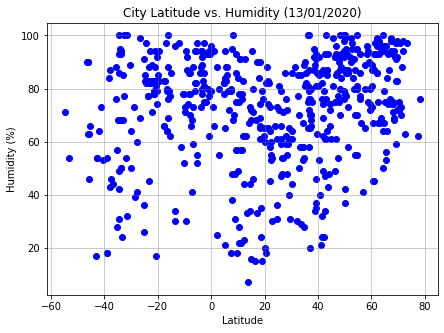

In [22]:
# Generate the plot: Latitude vs Humidity
fig = plt.figure(figsize=(7,5))

plt.scatter(weather_data['lat'], weather_data['humidity'], marker="o", facecolors="blue", edgecolors="blue")

plt.grid(color='grey', alpha=0.5)

plt.title("City Latitude vs. Humidity (13/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Images/lat-humidity.png")
plt.show()

In [43]:
# Humidity percentage does not show a correlation with latitude. This means that there are 
# cities close to the equator that have high and others that have low percentages of humidity, and both record
# high temperature. Although, there seems to be a higher number of cities with high percentage of humidity around 
# the equator, this could also be said for the rest of the latitudes in the sample. Indeed, there is a numerous 
# concentration of cities with high humidity percentage between 40° and 60° North. 
# So humidity does not seem to be a defining factor (1) around the equator, (2) for indicating higher temperature
# or (3) lower temperature. 

#### Latitude vs. Cloudiness Plot

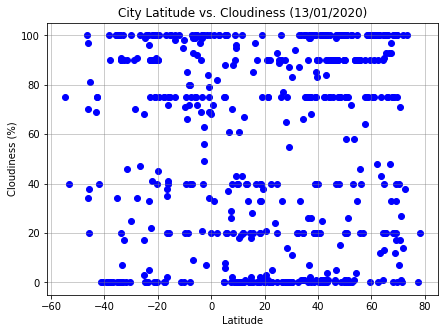

In [23]:
# Generate the plot: Latitude vs Cloudiness
fig = plt.figure(figsize=(7,5))

plt.scatter(weather_data['lat'], weather_data['cloudiness'], marker="o", facecolors="blue", edgecolors="blue")

plt.grid(color='grey', alpha=0.5)

plt.title("City Latitude vs. Cloudiness (13/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../Images/lat-cloudiness.png")
plt.show()

In [ ]:
# When plotting cloudiness against latitudes, it is also apparent that there is no correlation between the two 
# variables. The data values are scattered throughout the domain set, with a few concentrations: (1) around zero 
# cloudiness, but across the spectrum of latitudes; (2) around 100% cloudiness, but also across the spectrum of 
# latitudes; (3) lesser concentrations around 20%, 40% and about 78% cloudiness, again across the spectrum of 
# latitudes. As data was collected in January, it would be expected that (1) above would show a higher concentration
# in the south hemisphere, where it is summer, and (2) would show a higher concentration in the north hemisphere, 
# where it is winter. The data sampled does not support these assumptions. It also does not provide any trend 
# between the two variables.

#### Latitude vs. Wind Speed Plot

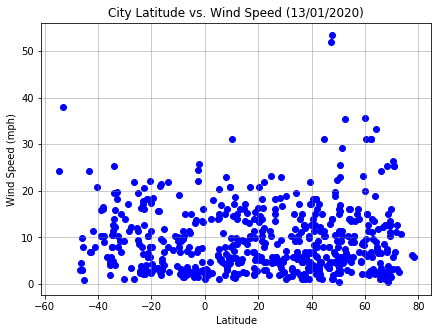

In [24]:
# Generate the plot: Latitude vs Wind Speed
fig = plt.figure(figsize=(7,5))

plt.scatter(weather_data['lat'], weather_data['wind_speed'], marker="o", facecolors="blue", edgecolors="blue")

plt.grid(color='grey', alpha=0.5)

plt.title("City Latitude vs. Wind Speed (13/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../Images/lat-wind.png")
plt.show()

In [ ]:
# The scatter plot seems to show a slightly positive correlation of higher wind speed with "tail latitudes". The 
# graph predominantly shows that wind speed concentrates between 0 and 20 mph across the spectrum of latitudes of the
# sample, with some a few points between 20 and 40 mph. There are 2 outliers reaching above 50 mph, both with 
# latitudes around 48° North (some examples of cities with latitude around 48° are Minnesota in the US, Ontario in 
# Canada, Munich in Germany, Xinjiang in China). I decided to check if trend lines would show this positive 
# correlation.


In [58]:
#Check for fit

# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data['lat'], weather_data['wind_speed'])
fit = slope * weather_data['lat'] + intercept

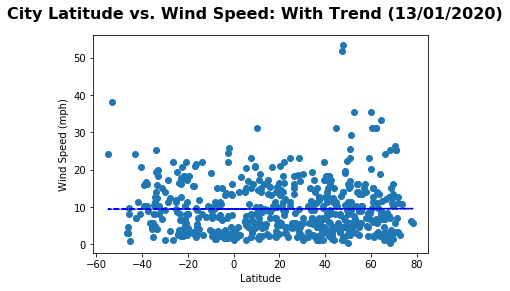

In [61]:
# Plot the data with a regression line 

fig, ax = plt.subplots()

fig.suptitle("City Latitude vs. Wind Speed: With Linear Trend (13/01/2020)", fontsize=16, fontweight="bold")

ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")

ax.plot(weather_data['lat'], weather_data['wind_speed'], linewidth=0, marker='o')
ax.plot(weather_data['lat'], fit, 'b--')

plt.savefig("../Images/lat-wind-trend.png")
plt.show()



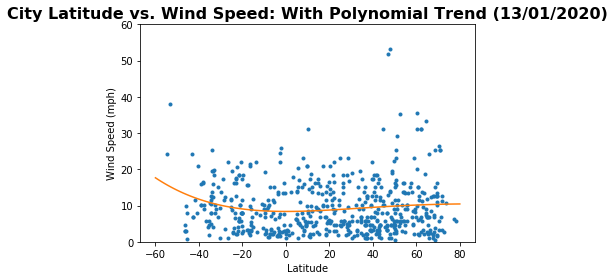

In [64]:
# Plot the data with a polynomial regression fit line 
import warnings

z = np.polyfit(weather_data['lat'], weather_data['wind_speed'], 4)

p = np.poly1d(z)
p30 = np.poly1d(np.polyfit(weather_data['lat'], weather_data['wind_speed'], 30))

xp = np.linspace(-60, 80, 100)
_ = plt.plot(weather_data['lat'], weather_data['wind_speed'], '.', xp, p(xp), '-')
plt.ylim(0,60)

plt.title("City Latitude vs. Wind Speed: With Polynomial Trend (13/01/2020)", fontsize=16, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../Images/lat-wind-trendpoly.png")
plt.show()


In [ ]:
# The linear regression does not pick up the tail behaviour, as expected. But the polynomial fit does, especially
# for latitudes higher than 30° south (i.e. as one gets closer to the antartic circle). The positive slope for 
# latitudes in the nothern hemisphere is much smaller, but still positive. So one can conclude that there is higher
# wind speed in locations beyond around 30° of latitude both north and south, with a stronger relationship being 
# verified in the southern hemisphere, given the sample.